In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('MatNavi_Mechanical_properties_of_low_alloy_steels.csv')

In [3]:
data.head().T

,0,1,2,3,4
Alloy code,MBB,MBB,MBB,MBB,MBB
C,0.12,0.12,0.12,0.12,0.12
Si,0.36,0.36,0.36,0.36,0.36
Mn,0.52,0.52,0.52,0.52,0.52
P,0.009,0.009,0.009,0.009,0.009
S,0.003,0.003,0.003,0.003,0.003
Ni,0.089,0.089,0.089,0.089,0.089
Cr,0.97,0.97,0.97,0.97,0.97
Mo,0.61,0.61,0.61,0.61,0.61
Cu,0.04,0.04,0.04,0.04,0.04


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alloy code                915 non-null    object 
 1    C                        915 non-null    float64
 2    Si                       915 non-null    float64
 3    Mn                       915 non-null    float64
 4    P                        915 non-null    float64
 5    S                        915 non-null    float64
 6    Ni                       915 non-null    float64
 7    Cr                       915 non-null    float64
 8    Mo                       915 non-null    float64
 9    Cu                       915 non-null    float64
 10  V                         915 non-null    float64
 11   Al                       915 non-null    float64
 12   N                        915 non-null    float64
 13  Ceq                       915 non-null    float64
 14  Nb + Ta   

In [4]:
data.isnull().sum()

Alloy code                  0
 C                          0
 Si                         0
 Mn                         0
 P                          0
 S                          0
 Ni                         0
 Cr                         0
 Mo                         0
 Cu                         0
V                           0
 Al                         0
 N                          0
Ceq                         0
Nb + Ta                     0
 Temperature (°C)           0
 0.2% Proof Stress (MPa)    0
 Tensile Strength (MPa)     0
 Elongation (%)             0
 Reduction in Area (%)      0
dtype: int64

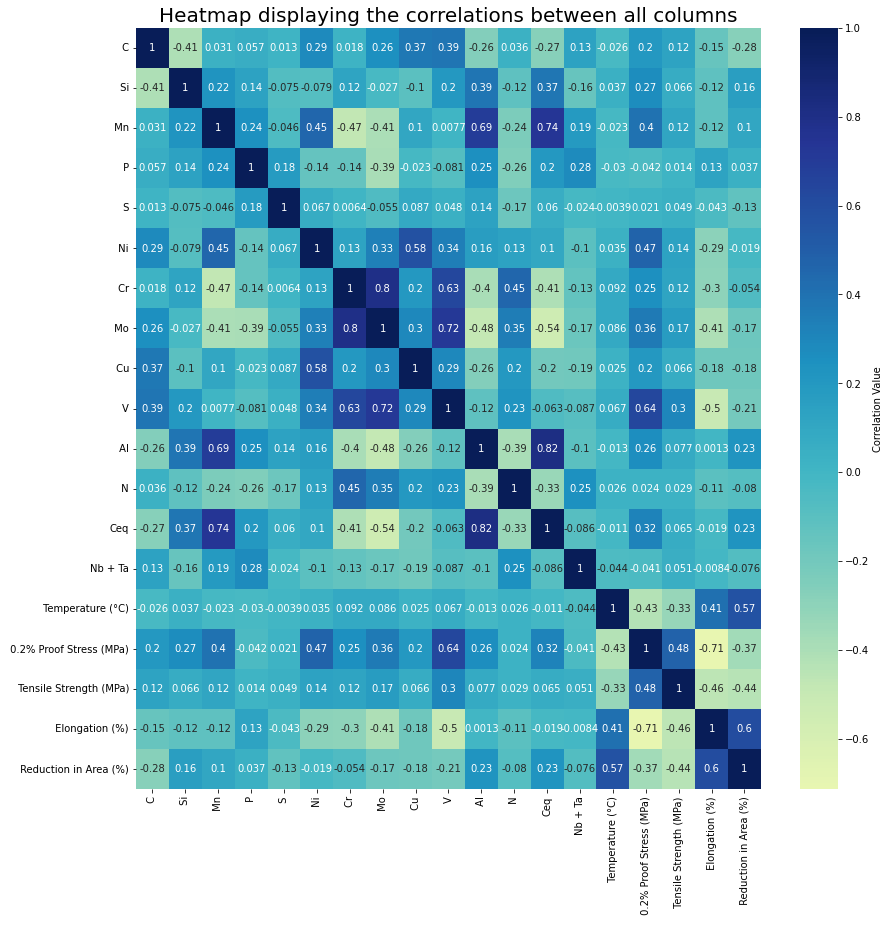

In [5]:
corr = data.corr()

plt.figure(figsize=(14,14))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(corr, center=0, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Value'})
plt.show()

In [7]:
data = data.drop(columns='Alloy code')
data.head().T

,0,1,2,3,4
C,0.1200,0.1200,0.1200,0.1200,0.1200
Si,0.3600,0.3600,0.3600,0.3600,0.3600
Mn,0.5200,0.5200,0.5200,0.5200,0.5200
P,0.0090,0.0090,0.0090,0.0090,0.0090
S,0.0030,0.0030,0.0030,0.0030,0.0030
Ni,0.0890,0.0890,0.0890,0.0890,0.0890
Cr,0.9700,0.9700,0.9700,0.9700,0.9700
Mo,0.6100,0.6100,0.6100,0.6100,0.6100
Cu,0.0400,0.0400,0.0400,0.0400,0.0400
V,0.0000,0.0000,0.0000,0.0000,0.0000


In [43]:
# Proof Stress as function of alloy content

In [8]:
X = data.iloc[:,0:15].values

In [9]:
y = data.iloc[:,15].values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [11]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
#linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score : {}'.format(r2))

r2 score : 0.8936164498681914


In [55]:
# XGBRegressor

In [13]:
from xgboost import XGBRegressor

model = XGBRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.9752775461794017


In [56]:
# Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor

model_IoT = RandomForestRegressor().fit(X_train,y_train)
y_pred= model_IoT.predict(X_test)
r2_IoT = r2_score(y_test, y_pred)
print('r2 score for IoT: {}'.format(r2_IoT))

r2 score for IoT: 0.9794036208043342


In [57]:
#Linear regression Ridge regularization

In [15]:
from sklearn.linear_model import Ridge

model = Ridge().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.8934986449328584


In [58]:
#Linear regression Lasso regularization

In [16]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.8871725612655726


In [59]:
#polynomial fit with degree 5

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=5, include_bias=False), 
    #MinMaxScaler(), 
    LinearRegression())
poly_pipeline

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linearregression', LinearRegression())])

In [18]:
poly_pipeline.fit(X_train, y_train)
y_pred = poly_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.8567329055854949


In [44]:
#Tensile strength as function of temerature and alloy content

In [19]:
y = data.iloc[:,16]
y.head()

0    490
1    454
2    465
3    495
4    489
Name:  Tensile Strength (MPa), dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [21]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score : {}'.format(r2))

r2 score : 0.6778724350685121


In [23]:
model = XGBRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.9808886058634181


In [24]:
model = RandomForestRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.9746548752719987


In [25]:
model = Ridge().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.6789788926022717


In [26]:
model = Lasso().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.694590218036548


In [27]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), 
    #MinMaxScaler(), 
    LinearRegression())
poly_pipeline

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [28]:
poly_pipeline.fit(X_train, y_train)
y_pred = poly_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.6107196883146115


In [45]:
#Elongation as function alloy content and temperature

In [29]:
y = data.iloc[:,17]
y.head()

0    30
1    27
2    23
3    21
4    26
Name:  Elongation (%), dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [31]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score : {}'.format(r2))

r2 score : 0.584995464165518


In [33]:
model = XGBRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.9296589202903535


In [34]:
model = RandomForestRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.9184463526939686


In [35]:
model = Ridge().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.5848037266441435


In [36]:
model = Lasso().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.47086058181186774


In [37]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), 
    #MinMaxScaler(), 
    LinearRegression())
poly_pipeline

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [38]:
poly_pipeline.fit(X_train, y_train)
y_pred = poly_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.816906647930936


In [46]:
#Reduction in area as function of temperature and alloy content

In [39]:
y = data.iloc[:,18]

In [40]:
y.head()

0    71
1    72
2    69
3    70
4    79
Name:  Reduction in Area (%), dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [42]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
model = RandomForestRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.801322872402593


In [48]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score : {}'.format(r2))

r2 score : 0.5148150237763447


In [49]:
model = XGBRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.824757205408122


In [50]:
model = Ridge().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.5150178932868759


In [51]:
model = Lasso().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.41363086618170264


In [52]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), 
    #MinMaxScaler(), 
    LinearRegression())
poly_pipeline

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [53]:
poly_pipeline.fit(X_train, y_train)
y_pred = poly_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.7650083962118788
